# Project Foundations for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/MIT/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape


(1898, 10)

In [ ]:
#Establish restaurant names
#restaurantname=df['restaurant_name'].unique().sum()
restaurantname=df['restaurant_name'].value_counts()
df2=restaurantname
df2.count()
#restaurantname.value_counts()
#Establish count
#restaurantname.sum()


178

In [ ]:
category_counts = df['cuisine_type'].value_counts()
category_counts*100/df.shape[0]

,count
cuisine_type,
American,30.769231
Japanese,24.762908
Italian,15.700738
Chinese,11.327713
Mexican,4.056902
Indian,3.846154
Middle Eastern,2.581665
Mediterranean,2.423604
Thai,1.001054


#### Observations:
The shape of the dataset is a tuple of 2 elements. The first element shows the number of rows (1898) in the data and the second element shows the number of columns (9) in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three different data types - int64 (represents numerical variables) and object (represents categorical variables) and floats (whole numbers without decimal points)
There are 4 numerical columns - order_id, customer_id, food_preperation_time, delivery_time
There is one numerical columns though with whole cost_of_the_order
The rest of the columns are categorical
Oddly, rating is a categorical variable here.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no null values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()


,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
There are 736 orders that are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

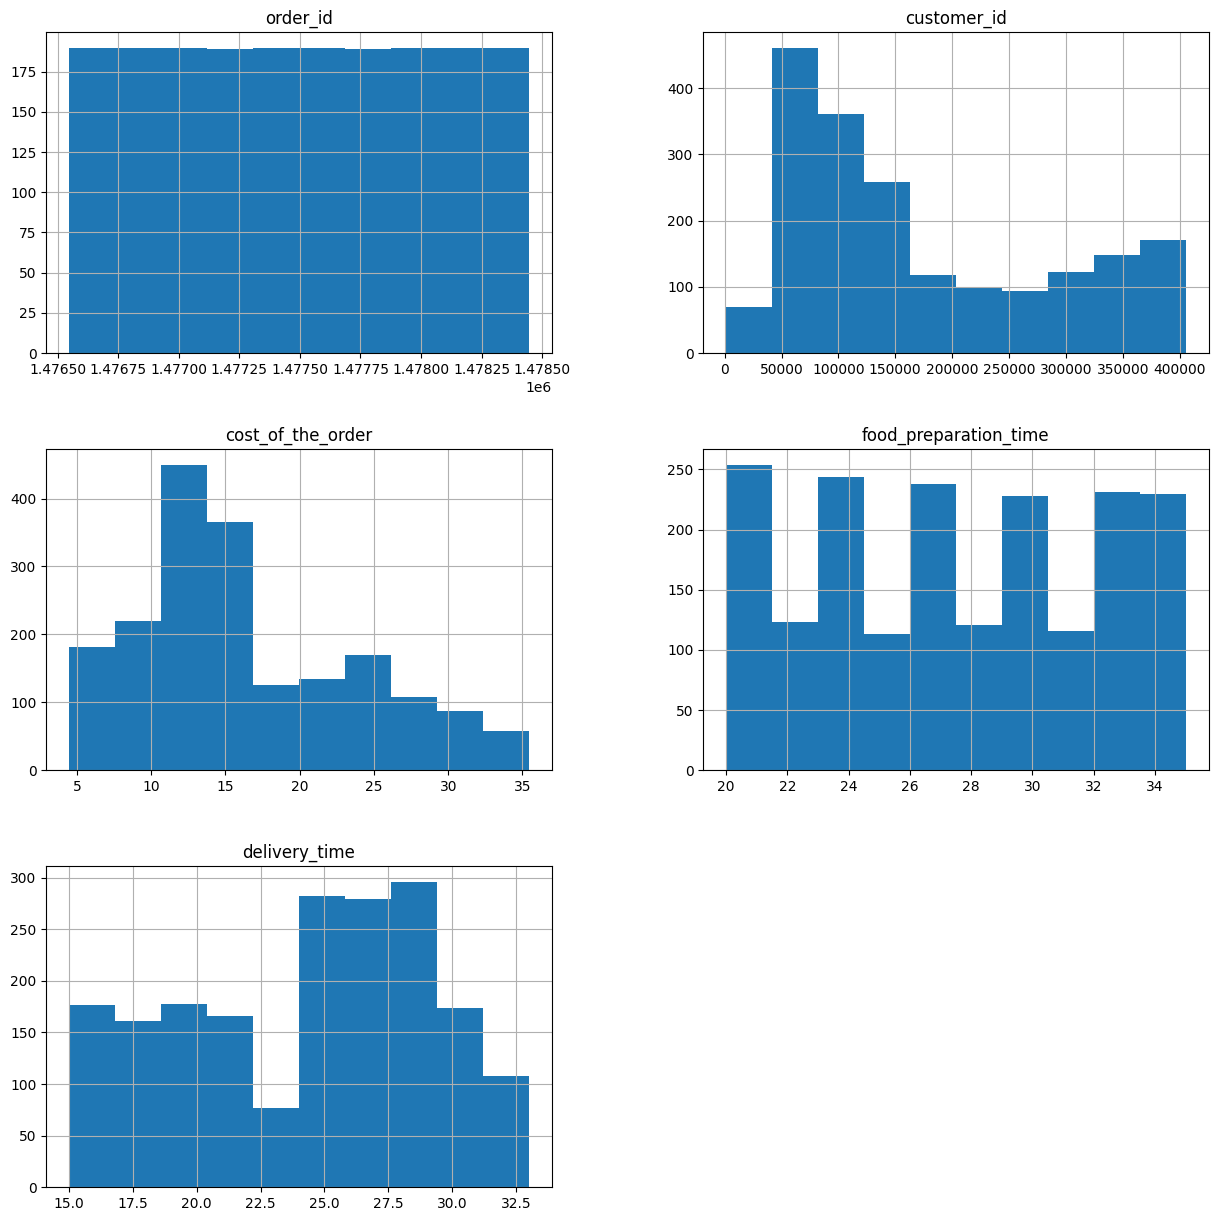

In [ ]:
# Write the code here
df.hist(figsize=(15,15))
plt.show()

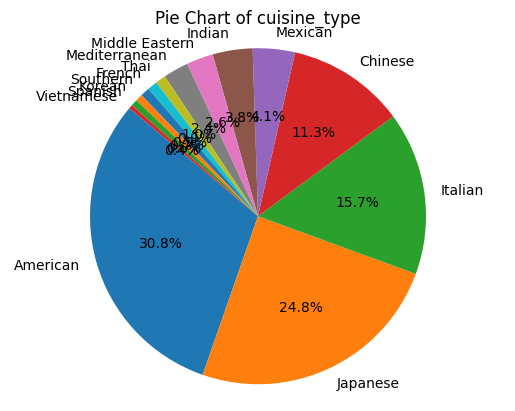

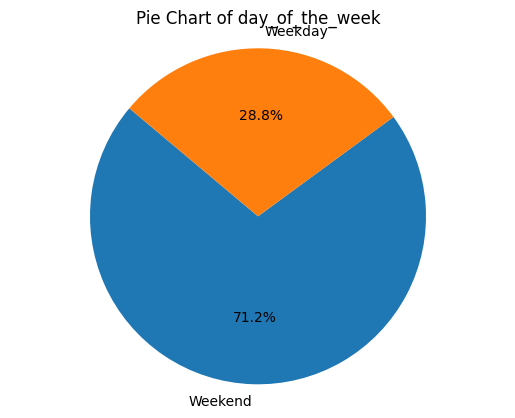

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


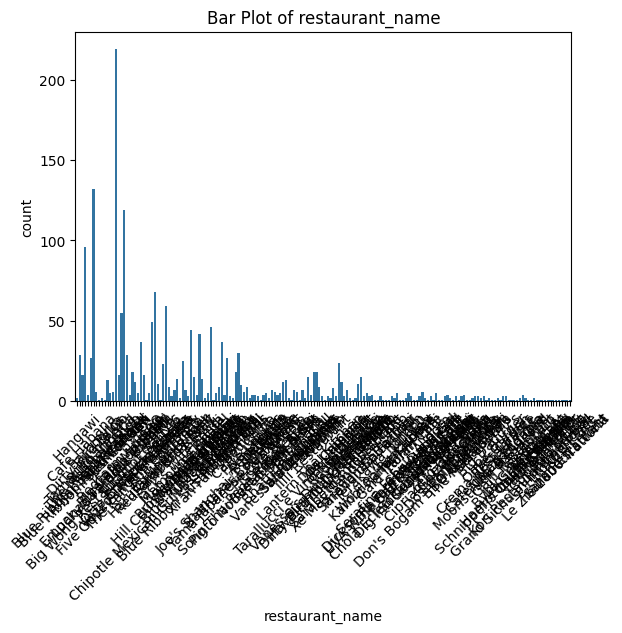

In [ ]:


category_counts = df['cuisine_type'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of cuisine_type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


category_counts = df['day_of_the_week'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of day_of_the_week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


sns.countplot(x='restaurant_name', data=df)
plt.title('Bar Plot of restaurant_name')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df.groupby('restaurant_name').count().sort_values(by='order_id', ascending=False).head(5)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,219,219,219,219,219,219,219,219
The Meatball Shop,132,132,132,132,132,132,132,132
Blue Ribbon Sushi,119,119,119,119,119,119,119,119
Blue Ribbon Fried Chicken,96,96,96,96,96,96,96,96
Parm,68,68,68,68,68,68,68,68


#### Observations:
The top five restaurants are Shake Shack(219 orders), The Meatball Shop(132 orders), Blue Ribbon Sushi(119 orders), Blue Ribbon Fried Chicken(96 orders) and Parm(68 orders)


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type').count().sort_values(by='order_id', ascending=False).head(1)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415


#### Observations:
The  most popular cuisine is American cuisine accounting for 415 of the 1898 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
df[df['cost_of_the_order'] > 20].count()/df.count()*100

,0
order_id,29.241307
customer_id,29.241307
restaurant_name,29.241307
cuisine_type,29.241307
cost_of_the_order,29.241307
day_of_the_week,29.241307
rating,29.241307
food_preparation_time,29.241307
delivery_time,29.241307




```
# This is formatted as code
```

#### Observations:
29.2% of the orders cost more than $20


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24.16min
This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
#write the code here
df.groupby('customer_id').count().sort_values(by='order_id', ascending =False).head(3)

,order_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
customer_id,,,,,,,,
52832,13,13,13,13,13,13,13,13
47440,10,10,10,10,10,10,10,10
83287,9,9,9,9,9,9,9,9


#### Observations:
The unique three Customers are 52832, 47440 and 83287 each ordering 13, 10 and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

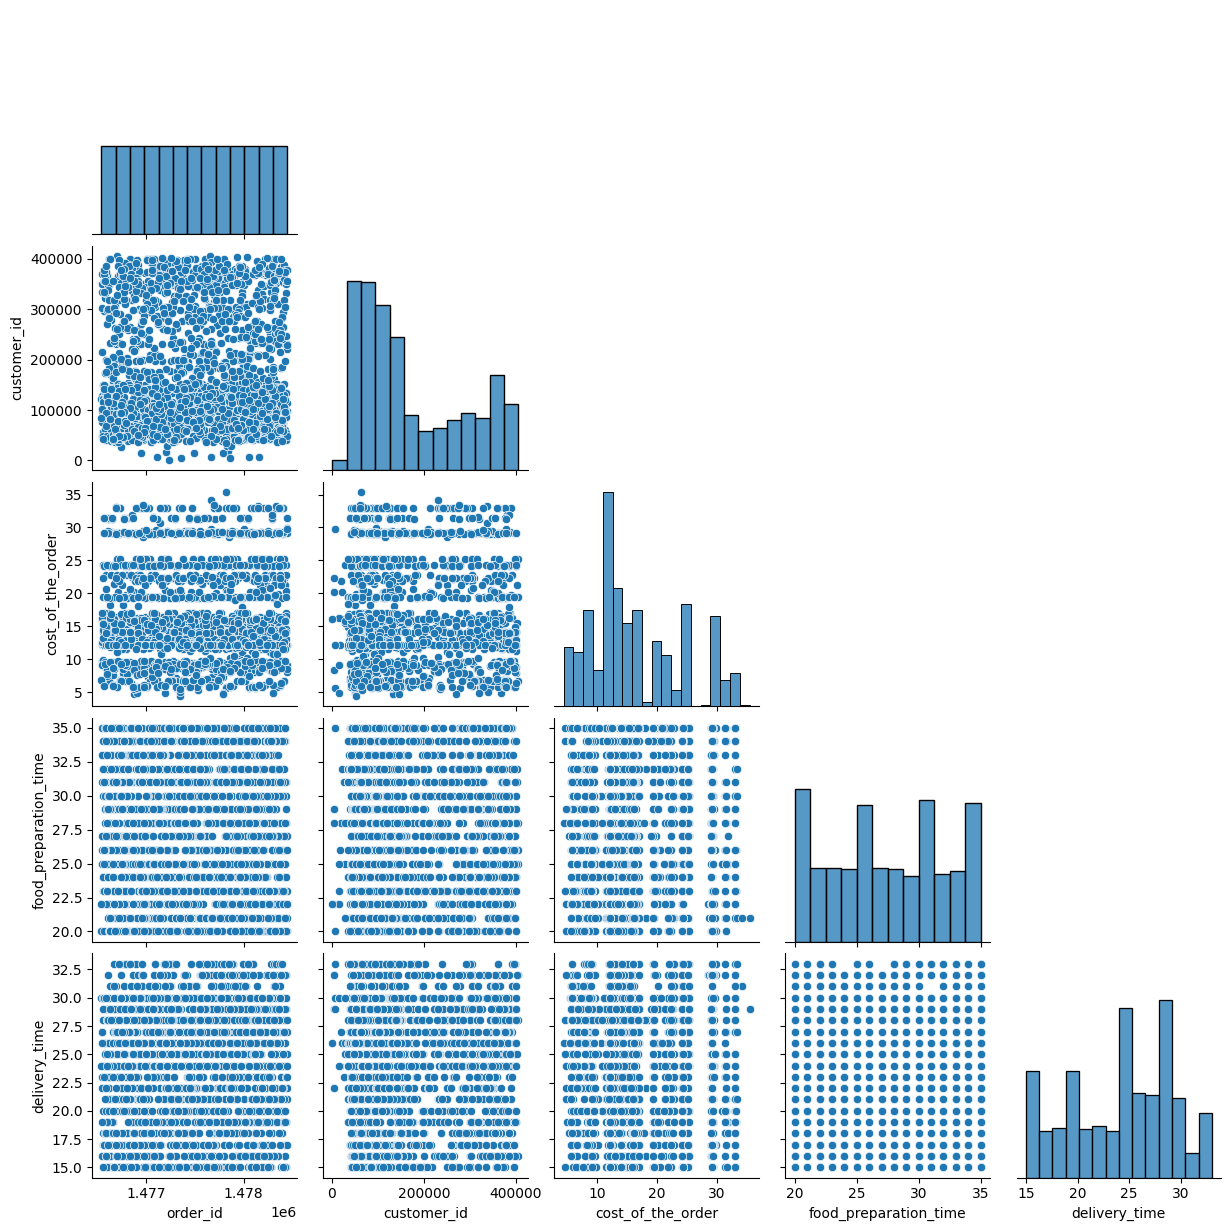

In [ ]:
# Write the code here
sns.pairplot(df, corner=True)
plt.show()

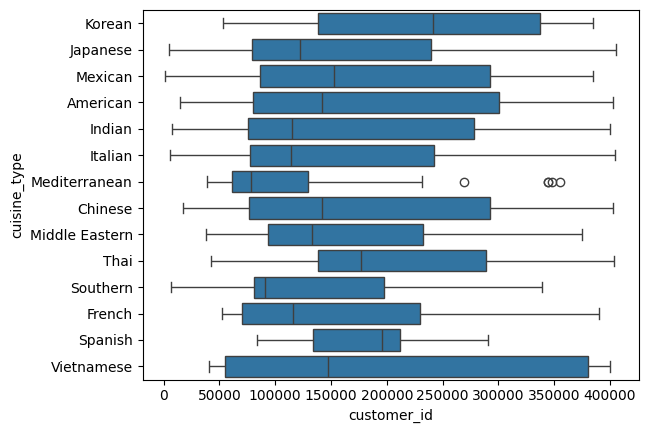

In [ ]:
sns.boxplot(data=df, x='customer_id', y='cuisine_type')
plt.show()



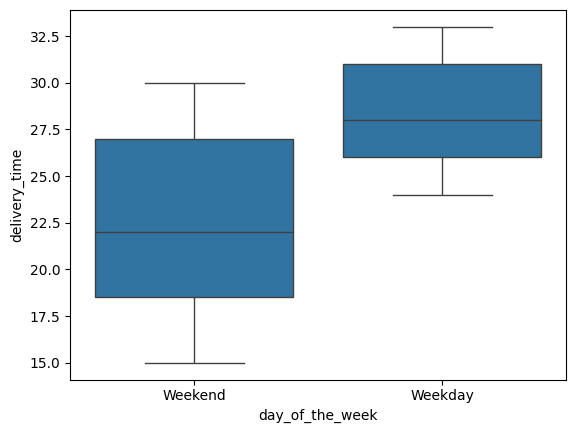

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here

# Convert 'rating' column to numeric, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df[(df['rating'] > 4) & (df['rating'].count() > 50)].groupby('restaurant_name').count().sort_values(by='rating', ascending=False).head(5)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,60,60,60,60,60,60,60,60
The Meatball Shop,53,53,53,53,53,53,53,53
Blue Ribbon Sushi,32,32,32,32,32,32,32,32
Blue Ribbon Fried Chicken,32,32,32,32,32,32,32,32
RedFarm Broadway,18,18,18,18,18,18,18,18


#### Observations:

For some restaurants ratings were not given

1.   For some restaurants ratings were not given
2.   Only two restaurants qualify for the promotional offer namely Shake Shack and The Meatball Shop which were also the top two restaurants earlier




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
revenue1 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25
revenue1 = revenue1.sum()
print(revenue1)

revenue2 = df[(df['cost_of_the_order'] <= 20) & (df['cost_of_the_order'] > 5)]['cost_of_the_order'] * 0.15
revenue2 = revenue2.sum()
print(revenue2)

total_revenue = revenue1 + revenue2
print(total_revenue)


3688.7275
2477.5755
6166.303


#### Observations:
The total Revenue earned as commission above $20 is $3,688 while below $20 is $2478 totlling to $6166


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df[df['total_time'] >60].count()/df.count()*100

,0
order_id,10.537408
customer_id,10.537408
restaurant_name,10.537408
cuisine_type,10.537408
cost_of_the_order,10.537408
day_of_the_week,10.537408
rating,10.240964
food_preparation_time,10.537408
delivery_time,10.537408
total_time,10.537408


#### Observations:
Only 10% of the orders take more than 60min to deliver


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

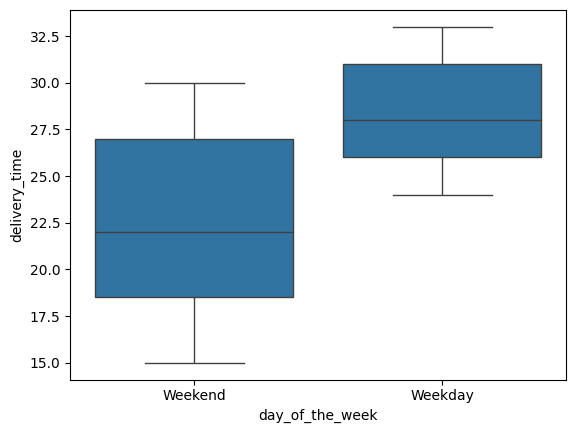

In [ ]:
# Write the code here
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

#### Observations:
The average delivery time on weekends is about 22.5min while on weekdays it is 27.5min

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  

1.   The data consists of responses from 1898 responses customers, 178 restaurants were covered in this analysis. A few key areas were covered in this analysis such as delivery time, cuisine type, cost of order, food preparation time and day of delivery in the week.
2.   An analysis of the data indicates that the demand of food from the the different resturants was determined by a anumber of factors, namely the rating of the restaurant and its type of cuisine.
2.   Most orders cost on averaage USD 14 while the maximum is USD35. 71% OF THE orders cost less than 20USD while 5% of the orders cost more than USD30. The top ordered types of cuisines noted were American, Japanese, Italian, Chinese and Mexican. The top cuisine on weekends was however American
3.   Most restaurants experienced high demands on weekends when delivery times were lower than on weekedays by about 5min.
4.   The preparation times varied from 20- 35 min while delivey time varied from 15-33min. 90% of the orders take upto 42min taking into account the time taken from preparation to delivery.
5.   Some restaurants were not keen on following up on ratings resulting in about 40% not recieving any ratings from respondents. This has an impact on any future campaign such as discounts as well as promotional offers provided on advertisments as shown in the analyis above.







### Recommendations:

I recommend the following:
* Restaurants should adopt ways of including the American cuisisne in their menus and where possible include products which cost of about USD 20 or less especially on weekends when the delivery time is lower so as to improve sales as well as ratings.
* Rating a restaurant should be an integral part of its services. Restaurant need to encourage customers to carry this out so as to provide feedback on its services and thus help them improve their efficienct. This also has an impact on any future campaign such as discounts as well as promotional offers provided on advertisments as shown in the analyis above.
*   All restaurants should work to ensure their total time to make a delivery, from preparation to delivery should be 45min. This will ensure the 10% who stil take more than 60min improve their services and ratings
*   The restaurants selling food stuffs with no market should change their market focus. These include Vietnamese, Spanish, Koewan, Southern, French and Thai which have less than 1% presence in the market.



---